# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Moh.Lukman Hakim
- Email: lukman.fun1@gmail.com
- Id Dicoding: lukman051201

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan yang kita miliki?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
- Bagaimana tingkat kepuasan pelanggan terhadap layanan kami?
- Bagaimana letak geografis pelanggan terbanyak?

## Menyaipkan semua library yang dibuthkan

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Data Wrangling

### Gathering Data

In [172]:
customers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [173]:
geolocations_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [174]:
order_items_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [175]:
order_payments_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [176]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [177]:
orders_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [178]:
product_category_name_transalations_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_name_transalations_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [179]:
products_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [180]:
sellers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Tampilkan info `data type` tiap `DataFrame`

In [181]:
print('\n=====Data Type Customers=====')
print(customers_df.info())

print('\n=====Data Type Geo locations=====')
print(geolocations_df.info())

print('\n=====Data Type Order Items=====')
print(order_items_df.info())

print('\n=====Data Type Order Payments=====')
print(order_payments_df.info())

print('\n=====Data Type Order Reviews=====')
print(order_reviews_df.info())

print('\n=====Data Type Orders=====')
print(orders_df.info())

print('\n=====Data Type Product Category Name Transaltions=====')
print(product_category_name_transalations_df.info())

print('\n=====Data Type Products=====')
print(products_df.info())

print('\n=====Data Type Sellers=====')
print(sellers_df.info())


=====Data Type Customers=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

=====Data Type Geo locations=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163

Tampilkan info `data null` tiap `DataFrame`

In [182]:
print('\n=====Data Null Customers=====')
print(customers_df.isna().sum())

print('\n=====Data Null Geo locations=====')
print(geolocations_df.isna().sum())

print('\n=====Data Null Order Items=====')
print(order_items_df.isna().sum())

print('\n=====Data Null Order Payments=====')
print(order_payments_df.isna().sum())

print('\n=====Data Null Order Reviews=====')
print(order_reviews_df.isna().sum())

print('\n=====Data Null Orders=====')
print(orders_df.isna().sum())

print('\n=====Data Null Product Category Name Transaltions=====')
print(product_category_name_transalations_df.isna().sum())

print('\n=====Data Null Products=====')
print(products_df.isna().sum())

print('\n=====Data Null Sellers=====')
print(sellers_df.isna().sum())


=====Data Null Customers=====
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

=====Data Null Geo locations=====
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

=====Data Null Order Items=====
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

=====Data Null Order Payments=====
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

=====Data Null Order Reviews=====
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message    

Tampilkan info `data duplicate` tiap `DataFrame`

In [183]:
print('\n=====Data Duplicate Customers=====')
print('Total :', customers_df.duplicated().sum())

print('\n=====Data Duplicate Geo locations=====')
print('Total :', geolocations_df.duplicated().sum())

print('\n=====Data Duplicate Order Items=====')
print('Total :', order_items_df.duplicated().sum())

print('\n=====Data Duplicate Order Payments=====')
print('Total :', order_payments_df.duplicated().sum())

print('\n=====Data Duplicate Order Reviews=====')
print('Total :', order_reviews_df.duplicated().sum())

print('\n=====Data Duplicate Orders=====')
print('Total :', orders_df.duplicated().sum())

print('\n=====Data Duplicate Product Category Name Transaltions=====')
print('Total :', product_category_name_transalations_df.duplicated().sum())

print('\n=====Data Duplicate Products=====')
print('Total :', products_df.duplicated().sum())

print('\n=====Data Duplicate Sellers=====')
print('Total :', sellers_df.duplicated().sum())


=====Data Duplicate Customers=====
Total : 0

=====Data Duplicate Geo locations=====
Total : 261831

=====Data Duplicate Order Items=====
Total : 0

=====Data Duplicate Order Payments=====
Total : 0

=====Data Duplicate Order Reviews=====
Total : 0

=====Data Duplicate Orders=====
Total : 0

=====Data Duplicate Product Category Name Transaltions=====
Total : 0

=====Data Duplicate Products=====
Total : 0

=====Data Duplicate Sellers=====
Total : 0


Tampilkan info `data describe all` tiap `DataFrame`

In [184]:
print('\n=====Data Describe All Customers=====')
print(customers_df.describe(include='all'))

print('\n=====Data Describe All Geo locations=====')
print(geolocations_df.describe(include='all'))

print('\n=====Data Describe All Order Items=====')
print(order_items_df.describe(include='all'))

print('\n=====Data Describe All Order Payments=====')
print(order_payments_df.describe(include='all'))

print('\n=====Data Describe All Order Reviews=====')
print(order_reviews_df.describe(include='all'))

print('\n=====Data Describe All Orders=====')
print(orders_df.describe(include='all'))

print('\n=====Data Describe All Product Category Name Transaltions=====')
print(product_category_name_transalations_df.describe(include='all'))

print('\n=====Data Describe All Products=====')
print(products_df.describe(include='all'))

print('\n=====Data Describe All Sellers=====')
print(sellers_df.describe(include='all'))


=====Data Describe All Customers=====
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_cod

In [185]:
print("==================== RINGKASAN MASALAH ====================")
pd.DataFrame({
    'VARIABLE': [
        'customers_df',
        'geolocations_df',
        'order_items_df',
        'order_payments_df',
        'order_reviews_df',
        'orders_df',
        'product_category_name_translations_df',
        'products_df',
        'sellers_df'
        ],
    'DATA TYPE': [
        '-',
        '-',
        'Terdapat kesalahan tipe data untuk kolom shipping_limit_date',
        '-',
        'Terdapat kesalahan tipe data untuk kolom review_creation_date & review_answer_timestamp',
        'Terdapat kesalahan tipe data untuk kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date &order_estimated_delivery_date',
        '-',
        '-',
        '-'
        ],
    'MISSING VALUE': [
        '-',
        '-',
        '-',
        '-',
        'Terdapat missing values pada kolom review_comment_title (87656) & review_comment_message (58247)',
        'Terdapat missing values pada kolom order_approved_at (160), order_delivered_carrier_date (1783) & order_delivered_customer_date (2965)',
        '-',
        'Terdapat missing values pada kolom product_category_name (610), product_name_lenght (610), product_description_lenght (610), product_photos_qty (610), product_weight_g (2), product_length_cm (2), product_height_cm (2), product_width_cm (2)',
        '-'
    ],
    'DUPLICATE DATA': [
        '-',
        'Terdapat 261831 data yang duplikat',
        '-',
        '-',
        '-',
        '-',
        '-',
        '-',
        '-'
    ],
    'INACCURATE VALUE': [
        '-',
        '-',
        '-',
        '-',
        '-',
        '-',
        '-',
        '-',
        '-'
    ]
})

==================== RINGKASAN MASALAH ====================


,VARIABLE,DATA TYPE,MISSING VALUE,DUPLICATE DATA,INACCURATE VALUE
0,customers_df,-,-,-,-
1,geolocations_df,-,-,Terdapat 261831 data yang duplikat,-
2,order_items_df,Terdapat kesalahan tipe data untuk kolom shipp...,-,-,-
3,order_payments_df,-,-,-,-
4,order_reviews_df,Terdapat kesalahan tipe data untuk kolom revie...,Terdapat missing values pada kolom review_comm...,-,-
5,orders_df,Terdapat kesalahan tipe data untuk kolom order...,Terdapat missing values pada kolom order_appro...,-,-
6,product_category_name_translations_df,-,-,-,-
7,products_df,-,Terdapat missing values pada kolom product_cat...,-,-
8,sellers_df,-,-,-,-


### Cleaning Data

Mengubah `data type` yang tidak sesuai tiap `DataFrame`

Order Items `object` ke `datetime`
1. shipping_limit_date

In [186]:
order_items_datetime = ['shipping_limit_date']

for column in order_items_datetime:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

Order Reviews `object` ke `datetime`

1. review_creation_date
2. review_answer_timestamp  

In [187]:
order_reviews_datetime = ['review_creation_date', 'review_answer_timestamp']

for column in order_reviews_datetime:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

Orders `object` ke `datetime`

1. order_purchase_timestamp
2. order_approved_at
3. order_delivered_carrier_date
4. order_delivered_customer_date
5. order_estimated_delivery_date

In [188]:
orders_datetime = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in orders_datetime:
  orders_df[column] = pd.to_datetime(orders_df[column])

Mebersihkan `data null` tiap `DataFrame`

Order Reviews dengan data null
1. review_comment_title (87656)
2. review_comment_message (58247)

In [189]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [190]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [191]:
print("Nilai unik setiap value : review_comment_title")
print(order_reviews_df.review_comment_title.value_counts())

print("\nNilai unik setiap value : review_comment_message")
print(order_reviews_df.review_comment_message.value_counts())

Nilai unik setiap value : review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

Nilai unik setiap value : review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                      

maka kita akan memakai `fillna()` untuk mengisi missing value dengan `komentar kosong`

In [192]:
order_reviews_df.review_comment_title.fillna(value='no title', inplace=True)
order_reviews_df.review_comment_message.fillna(value='no comment', inplace=True)

In [193]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Orders dengan data null
1. order_approved_at (160)
2. order_delivered_carrier_date (1783)
3. order_delivered_customer_date (2965)

In [194]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [195]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [196]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


dikarenakan kolom `date/waktu` yang `null` tergantung dari `order_status`, jadi saya tidak melakukan `drop & fillna`

Products dengan data null
1. product_category_name (610)
2. product_name_lenght (610)
3. product_description_lenght (610)
4. product_photos_qty (610)
5. product_weight_g (2)
6. product_length_cm (2)
7. product_height_cm (2)
8. product_width_cm (2)

In [197]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [198]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [199]:
products_df[products_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [200]:
products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [201]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
products_df[products_df.product_length_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
products_df[products_df.product_height_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
products_df[products_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


maka kita akan memakai `fillna()` untuk mengisi missing value



In [205]:
products_df.product_category_name.fillna(value='no category', inplace=True)
products_df.product_name_lenght.fillna(value=0, inplace=True)
products_df.product_description_lenght.fillna(value=0, inplace=True)
products_df.product_photos_qty.fillna(value=0, inplace=True)
products_df.product_weight_g.fillna(value=0, inplace=True)
products_df.product_length_cm.fillna(value=0, inplace=True)
products_df.product_height_cm.fillna(value=0, inplace=True)
products_df.product_width_cm.fillna(value=0, inplace=True)

Mebersihkan data duplicate tiap DataFrame

Membersihkan `geolocations` yang mempunyai data sama menggunakan `drop_duplicates`

In [206]:
geolocations_df[geolocations_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


maka kita akan memakai `drop_duplicates()` untuk menghapus data yg duplicate

In [207]:
geolocations_df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore Customers

In [208]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [209]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [210]:
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [211]:
customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [212]:
customers_df.groupby(by='customer_zip_code_prefix').customer_id.nunique().sort_values(ascending=False)

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
58421      1
58411      1
58398      1
58396      1
99990      1
Name: customer_id, Length: 14994, dtype: int64

bisa dilihat diatas kita mendapatkan data bahwa `customers` terbanyak berasal dari city `sao paulo` dan state `SP` dan zip code `22790`

setelah itu kita akan membuat kolom baru `status` pada `customers_df` untuk melihat siapa customer yg aktif dan tidak aktif berdasarkan `customer_id` yang ada pada `orders_df`

In [213]:
customer_id_in_orders_df = orders_df.customer_id.tolist()
customers_df['status'] = customers_df['customer_id'].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non-Active")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active


In [214]:
customers_df.groupby(by='status').customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

dari data diatas semua customer berstatus `Active`

### Explore Orders

sebelum itu kita akan menambahkan kolom baru `delivery_time` untuk menghitung berapa lama barang sampai ke customer

In [215]:
orders_delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']
orders_delivery_time = orders_delivery_time.apply(lambda x: x.total_seconds())
orders_df['delivery_time'] = round(orders_delivery_time/86400)

In [216]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0


In [217]:
orders_df.describe(include='all')

<ipython-input-217-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-217-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-217-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-217-caf441259110>:1: FutureW

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96475.000000
unique,99441,99441,8,98875,90733,81018,95664,459,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00,NaN
freq,1,1,96478,3,9,47,3,522,NaN
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.292314
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.776671
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


### Explore Orders & Customers

kita akan melakukan `merge/join` antara `orders_df` dan `customers_df`

In [218]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [219]:
orders_customers_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [220]:
orders_customers_df.groupby(by='customer_state').order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [221]:
orders_customers_df.groupby(by='customer_zip_code_prefix').order_id.nunique().sort_values(ascending=False).head(10)

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: order_id, dtype: int64

In [222]:
orders_customers_df.groupby(by='order_status').order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### Explore Order Payment & Order Reviews

kita akan melakukan `merge/join` antara `order_payments_df` dan `order_reviews_df`

In [223]:
order_payments_reviews_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

order_payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no title,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no title,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no title,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no title,no comment,2017-12-21,2017-12-22 01:10:39


In [224]:
order_payments_reviews_df.payment_value.sort_values(ascending=False)

52415    13664.08
34565     7274.88
41660     6929.31
49871     6922.21
86018     6726.66
           ...   
78326        0.00
51581        0.00
37030        0.00
94953        0.00
20031        0.00
Name: payment_value, Length: 104477, dtype: float64

In [225]:
order_payments_reviews_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [226]:
order_payments_reviews_df.groupby(by='payment_type').agg({
    'order_id': 'nunique',
    'payment_value': ['sum', 'min', 'max']
})

order_id payment_value                 
              nunique           sum    min       max
payment_type                                        
boleto          19784    2886679.49  11.62   7274.88
credit_card     76505   12594157.13   0.01  13664.08
debit_card       1528     218721.13  13.38   4445.50
not_defined         3          0.00   0.00      0.00
voucher          3866     381862.99   0.00   3184.34

### Explore Customer Order & Payment Reviews

kita akan melakukan `merge/join` antara `orders_customers` dan `order_payments_reviews`

In [227]:
ordercustomers_paymentreviews_df = pd.merge(
    left=orders_customers_df,
    right=order_payments_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

ordercustomers_paymentreviews_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no comment,2018-08-18,2018-08-22 19:07:58


### Explore Order Items & Sellers

kita akan melakukan `merge/join` antara `order_items_df` dan `sellers_df`

In [228]:
order_items_sellers_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)

order_items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [229]:
order_items_sellers_df.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [230]:
order_items_sellers_df.groupby(by='seller_state').seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

In [231]:
order_items_sellers_df.groupby(by='seller_zip_code_prefix').seller_id.nunique().sort_values(ascending=False)

seller_zip_code_prefix
14940    49
13660    10
13920     9
16200     9
87050     8
         ..
9411      1
9405      1
9400      1
9340      1
99730     1
Name: seller_id, Length: 2246, dtype: int64

### Explore Products & Product Category

kita akan melakukan `merge/join` antara `products_df` dan `product_category_name_transalations_df`

In [232]:
products_categories_df = pd.merge(
    left=products_df,
    right=product_category_name_transalations_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

products_categories_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [233]:
products_categories_df.groupby(by='product_category_name').product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 74, dtype: int64

In [234]:
products_categories_df.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
home_comfort_2                  5
fashion_childrens_clothes       5
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 71, dtype: int64

### Explore Order Item Sellers & Product Categories

kita akan melakukan `merge/join` antara `order_items_sellers_df` dan `products_categories_df`

In [235]:
productcategories_orderitemsellers_df = pd.merge(
    left=products_categories_df,
    right=order_items_sellers_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

productcategories_orderitemsellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [236]:
productcategories_orderitemsellers_df.price.sort_values(ascending=False)

20528    6735.00
73922    6729.00
49503    6499.00
71835    4799.00
32232    4690.00
          ...   
55911       1.20
55903       1.20
29610       0.85
29608       0.85
29609       0.85
Name: price, Length: 112650, dtype: float64

In [237]:
productcategories_orderitemsellers_df.groupby(by='product_category_name').agg({
    'order_id': 'nunique',
    'price': ['sum', 'min', 'max']
})

order_id      price                
                           nunique        sum    min      max
product_category_name                                        
agro_industria_e_comercio      182   72530.47  12.99  2990.00
alimentos                      450   29393.41   9.99   274.99
alimentos_bebidas              227   15179.48   6.50   699.90
artes                          202   24202.64   3.50  6499.00
artes_e_artesanato              23    1814.01   9.80   289.49
...                            ...        ...    ...      ...
sinalizacao_e_seguranca        140   21509.23   4.50   740.00
tablets_impressao_imagem        79    7528.41  14.90   889.99
telefonia                     4199  323667.53   5.00  2428.00
telefonia_fixa                 217   59583.00   6.00  1790.00
utilidades_domesticas         5884  632248.66   3.06  6735.00

[74 rows x 4 columns]

In [238]:
productcategories_orderitemsellers_df.groupby(by='product_category_name_english').agg({
    'order_id': 'nunique',
    'price': ['sum', 'min', 'max']
})

order_id       price                
                               nunique         sum    min      max
product_category_name_english                                     
agro_industry_and_commerce         182    72530.47  12.99  2990.00
air_conditioning                   253    55024.96  10.90  1599.00
art                                202    24202.64   3.50  6499.00
arts_and_craftmanship               23     1814.01   9.80   289.49
audio                              350    50688.50  14.90   598.99
...                                ...         ...    ...      ...
stationery                        2311   230943.23   2.29  1693.00
tablets_printing_image              79     7528.41  14.90   889.99
telephony                         4199   323667.53   5.00  2428.00
toys                              3886   483946.60   4.90  1699.99
watches_gifts                     5624  1205005.68   8.99  3999.90

[71 rows x 4 columns]

### Explore All Data

In [239]:
all_data = pd.merge(
    left=ordercustomers_paymentreviews_df,
    right=productcategories_orderitemsellers_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

all_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,87285b34884572647811a353c7ac498a,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,87285b34884572647811a353c7ac498a,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,87285b34884572647811a353c7ac498a,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,595fac2a385ac33a80bd5114aec74eb8,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,1.0,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no comment,2018-08-18,2018-08-22 19:07:58,aa4383b373c6aca5d8797843e5594415,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP


In [240]:
all_data.groupby(by=['customer_city', 'product_category_name_english']).agg({
    'price': 'sum',
    'freight_value': 'sum'
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [241]:
all_data.groupby(by=['customer_state', 'product_category_name_english']).agg({
    'price': 'sum',
    'freight_value': 'sum'
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [242]:
all_data.groupby(by='customer_state').agg({
    'order_id': 'nunique',
    'payment_value': ['sum', 'min', 'max', 'mean'],
    'review_score': ['min', 'max', 'mean']
})

order_id payment_value                               \
                nunique           sum    min       max        mean   
customer_state                                                       
AC                   81      24984.86  11.58   1251.70  262.998526   
AL                  413     112296.47   1.33   2269.98  242.018254   
AM                  148      34956.93   0.66   1853.75  202.063179   
AP                   68      21642.70  34.80   1482.42  257.651190   
BA                 3380     805070.98   0.10   3358.24  196.790755   
CE                 1336     349290.36   0.52   2734.11  223.188728   
DF                 2140     438095.32   0.67   3736.22  174.123736   
ES                 2033     408611.64   0.00   7274.88  173.140525   
GO                 2020     520481.65   0.00   4809.44  211.063118   
MA                  747     200363.24   1.70   3195.73  234.069206   
MG                11635    2351221.09   0.01   6081.54  170.144084   
MS                  715     167670.27   1.74   6929.31  194.513074   
MT                  907     257802.26   0.00   3242.84  227.740512   
PA                  975     263217.70   2.31   4042.74  233.142338   
PB                  536     181660.73   1.21   4681.78  282.081879   
PE                 1652     380294.18   0.52   3792.59  199.524753   
PI                  495     137158.89   3.35   1989.75  238.123073   
PR                 5045    1079795.49   0.03   3126.50  178.685337   
RJ                12852    2795615.67   0.00  13664.08  180.153091   
RN                  485     117192.91   5.43   1821.82  204.168833   
RO                  253      69184.48   3.29   2452.12  236.933151   
RR                   46      12462.21  39.03    994.77  239.657885   
RS                 5466    1160175.66   0.08   2455.12  176.506262   
SC                 3637     801276.45   0.34   3782.19  184.413452   
SE                  350      90651.44   0.39   1729.98  224.941538   
SP                41746    7726078.35   0.00   6726.66  153.716095   
TO                  280      72412.08   1.93   2784.16  212.976706   

               review_score                 
                        min  max      mean  
customer_state                              
AC                      1.0  5.0  4.094737  
AL                      1.0  5.0  3.715835  
AM                      1.0  5.0  4.070175  
AP                      1.0  5.0  4.240964  
BA                      1.0  5.0  3.807235  
CE                      1.0  5.0  3.810167  
DF                      1.0  5.0  3.987981  
ES                      1.0  5.0  3.974656  
GO                      1.0  5.0  3.975710  
MA                      1.0  5.0  3.670588  
MG                      1.0  5.0  4.068543  
MS                      1.0  5.0  4.054651  
MT                      1.0  5.0  3.890277  
PA                      1.0  5.0  3.786101  
PB                      1.0  5.0  3.992101  
PE                      1.0  5.0  3.957469  
PI                      1.0  5.0  3.849123  
PR                      1.0  5.0  4.087130  
RJ                      1.0  5.0  3.799830  
RN                      1.0  5.0  4.049296  
RO                      1.0  5.0  3.979381  
RR                      1.0  5.0  3.576923  
RS                      1.0  5.0  4.027184  
SC                      1.0  5.0  3.988861  
SE                      1.0  5.0  3.795511  
SP                      1.0  5.0  4.108796  
TO                      1.0  5.0  4.138643

In [243]:
all_data.groupby(by='product_category_name_english').agg({
    'order_id': 'nunique',
    'payment_value': ['sum', 'min', 'max', 'mean'],
    'review_score': ['min', 'max', 'mean']
})

order_id payment_value                  \
                               nunique           sum    min      max   
product_category_name_english                                          
agro_industry_and_commerce         182     118730.61   2.35  6081.54   
air_conditioning                   253      91170.66  26.00  1642.54   
art                                202      30992.93   5.54  6726.66   
arts_and_craftmanship               23       2326.17  23.88   314.32   
audio                              350      60388.62   0.70  1506.05   
...                                ...           ...    ...      ...   
stationery                        2311     318105.09   0.00  1784.20   
tablets_printing_image              79      10042.93  10.70   912.79   
telephony                         4199     487189.71   0.01  2457.44   
toys                              3886     619975.71   0.01  1782.55   
watches_gifts                     5624    1430553.48   0.23  4445.50   

                                          review_score                 
                                     mean          min  max      mean  
product_category_name_english                                          
agro_industry_and_commerce     471.153214          1.0  5.0  4.150794  
air_conditioning               301.889603          1.0  5.0  3.969697  
art                            141.520228          1.0  5.0  3.935484  
arts_and_craftmanship           96.923750          1.0  5.0  4.125000  
audio                          158.500315          1.0  5.0  3.840849  
...                                   ...          ...  ...       ...  
stationery                     121.182891          1.0  5.0  4.188339  
tablets_printing_image         115.435977          1.0  5.0  4.117647  
telephony                      103.087116          1.0  5.0  3.948849  
toys                           144.820301          1.0  5.0  4.162506  
watches_gifts                  230.251647          1.0  5.0  4.017692  

[71 rows x 8 columns]

Setelah proses selesai semua, kita akan `export` semua data menjadi 1 file

In [244]:
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: `Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?`

In [245]:
monthly_orders_df = all_data[all_data['order_approved_at'].dt.year == all_data['order_approved_at'].dt.year.max()].resample(rule='M', on='order_approved_at').agg({
    'order_id': 'nunique',
    'price': 'sum'
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    'order_id': 'order_count',
    'price': 'revenue'
}, inplace=True)

monthly_orders_df.head()

,order_approved_at,order_count,revenue
0,2018-01,7187,986284.61
1,2018-02,6706,882417.57
2,2018-03,7288,1039716.71
3,2018-04,6778,1010481.51
4,2018-05,7066,1056093.87


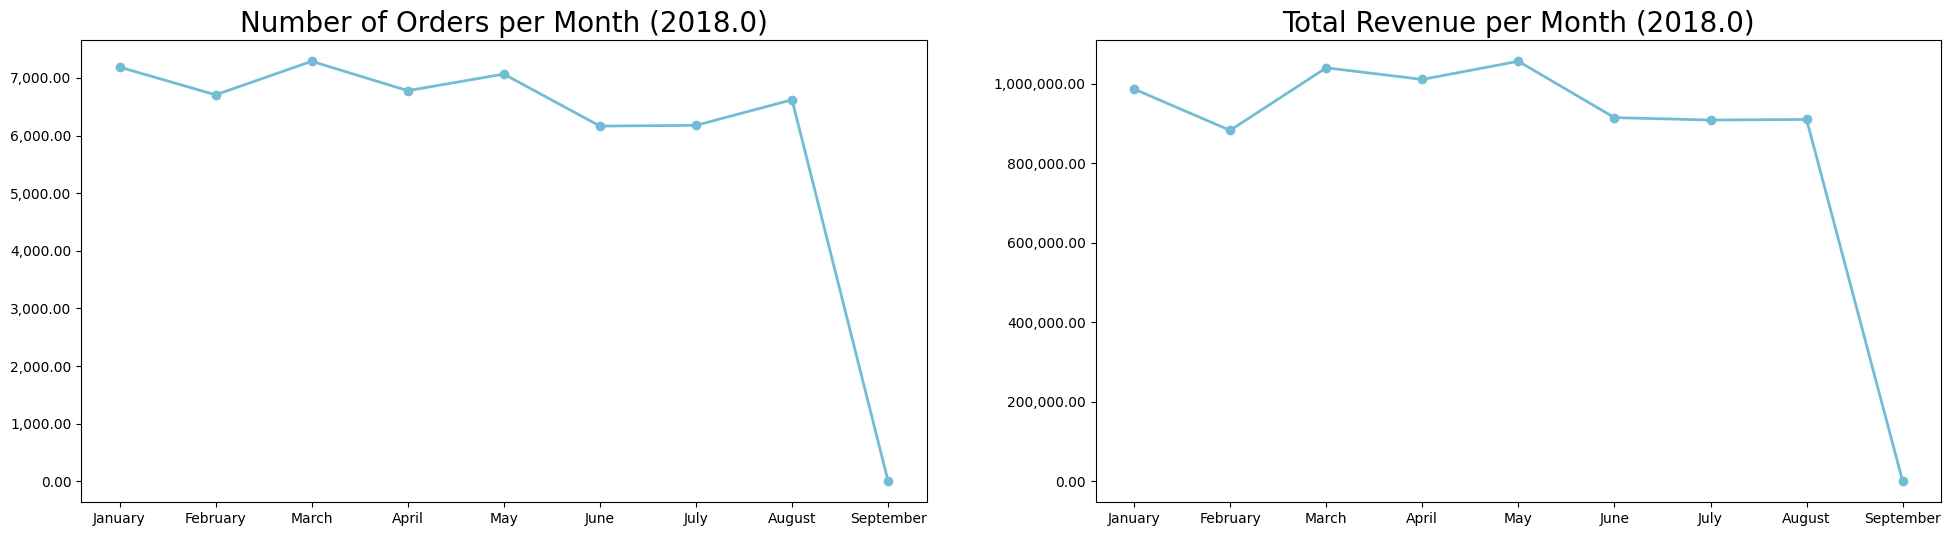

In [246]:
from matplotlib.ticker import StrMethodFormatter

monthly_orders_df = all_data[all_data['order_approved_at'].dt.year == all_data['order_approved_at'].dt.year.max()].resample(rule='M', on='order_approved_at').agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    'order_id': 'order_count',
    'payment_value': 'revenue'
}, inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

ax[0].plot(
    monthly_orders_df['order_approved_at'],
    monthly_orders_df['order_count'],
    marker='o',
    linewidth=2,
    color="#72BCD4"

    )
ax[0].set_title(f"Number of Orders per Month ({all_data['order_approved_at'].dt.year.max()})", loc="center", fontsize=20)
ax[0].set_xlabel(None, fontsize=10)
ax[0].set_ylabel(None, fontsize=10)
ax[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

ax[1].plot(
    monthly_orders_df['order_approved_at'],
    monthly_orders_df['revenue'],
    marker='o',
    linewidth=2,
    color="#72BCD4"

    )
ax[1].set_title(f"Total Revenue per Month ({all_data['order_approved_at'].dt.year.max()})", loc="center", fontsize=20)
ax[1].set_xlabel(None, fontsize=10)
ax[1].set_ylabel(None, fontsize=10)
ax[1].yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa `jumlah order` & `revenue terbanyak` terjadi pada bulan `Januari`, `Maret` dan `Mei`. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan `Februari`, `Juni` dan `September`.

### Pertanyaan 2: `Produk apa yang paling banyak dan paling sedikit terjual?`



In [247]:
total_sale_products = all_data.groupby(by='product_category_name_english').product_id.count().sort_values(ascending=False).reset_index()

total_sale_products.rename(columns={
    'product_category_name_english': 'category_name',
    'product_id': 'total_quantity'
}, inplace=True)

total_sale_products['category_name'] = total_sale_products['category_name'].str.replace('_', ' ')

total_sale_products.head()

,category_name,total_quantity
0,bed bath table,11988
1,health beauty,10032
2,sports leisure,9004
3,furniture decor,8832
4,computers accessories,8150


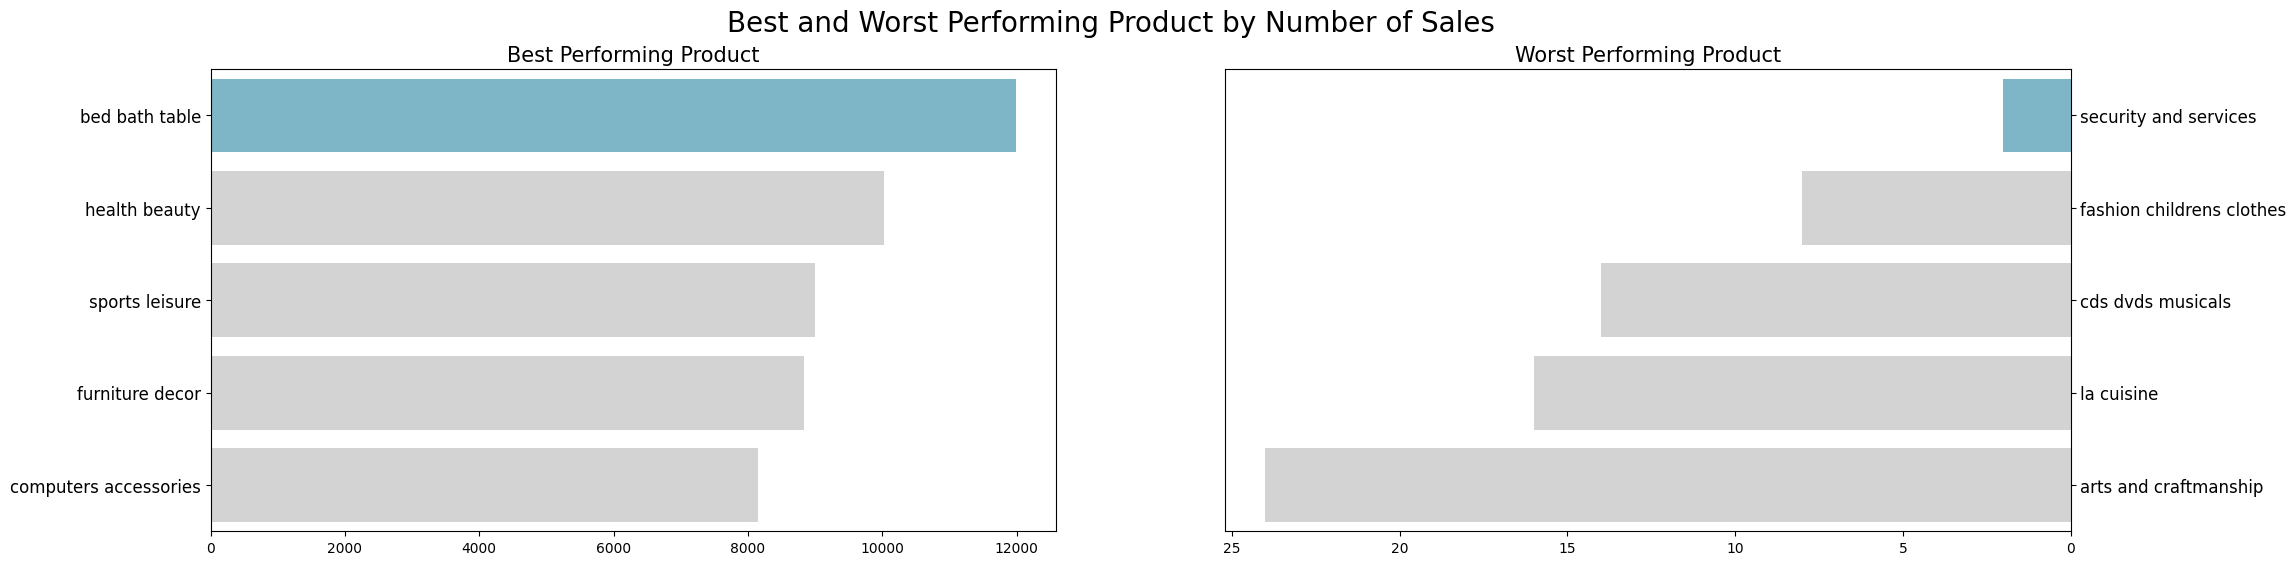

In [248]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(
    data=total_sale_products.head(5),
    x='total_quantity',
    y='category_name',
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    data=total_sale_products.sort_values(by='total_quantity', ascending=True).head(5),
    x='total_quantity',
    y='category_name',
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

diatas menunjukkan bahwa category product dengan penjualan tertinggi adalah `bed bath table`, sebaliknya penjualan terendah adalah `security and service`

### Pertanyaan 3: `Bagaimana demografi pelanggan yang kita miliki?`

In [249]:
customer_bystates = all_data.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).reset_index()
customer_bystates.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

customer_bystates.head()

,customer_state,customer_count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


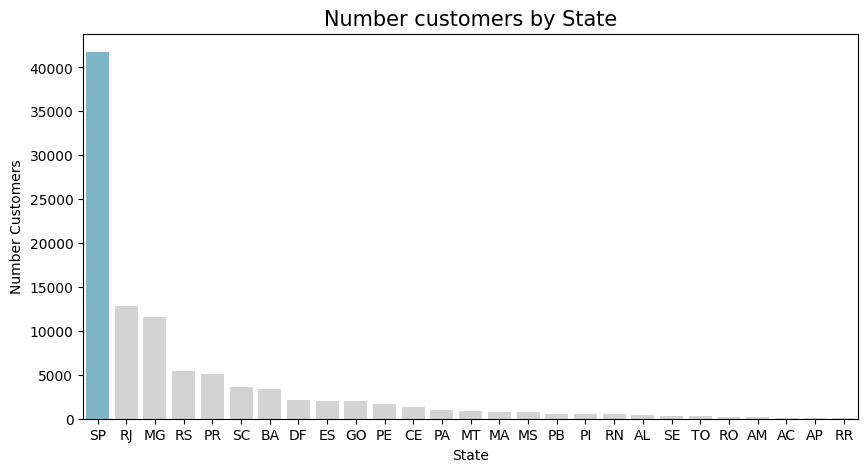

In [250]:
colors = ["#72BCD4" if state == customer_bystates['customer_state'][0] else "#D3D3D3" for state in customer_bystates['customer_state']]
plt.figure(figsize=(10, 5))

sns.barplot(
    data=customer_bystates,
    x='customer_state',
    y='customer_count',
    palette=colors
)
plt.title("Number customers by State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number Customers")
plt.xticks(fontsize=10)

plt.show()

diatas menunjukkan bahwa customer terbanyak berasal dari state `SP`

In [251]:
customer_bycities = all_data.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False).reset_index()
customer_bycities.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

customer_bycities.head()

,customer_city,customer_count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


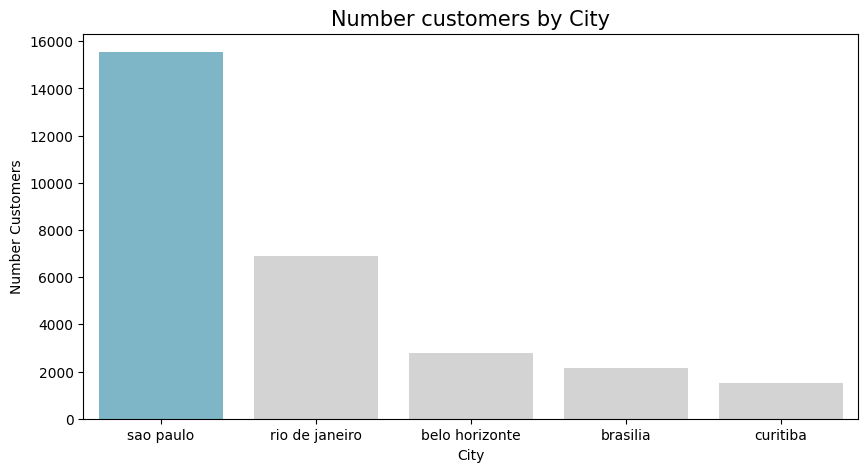

In [252]:
colors = ["#72BCD4" if cities == customer_bycities['customer_city'][0] else "#D3D3D3" for cities in customer_bycities['customer_city']]
plt.figure(figsize=(10, 5))

sns.barplot(
    data=customer_bycities.head(5),
    x='customer_city',
    y='customer_count',
    palette=colors
)
plt.title("Number customers by City", fontsize=15)
plt.xlabel("City")
plt.ylabel("Number Customers")
plt.xticks(fontsize=10)

plt.show()

diatas menunjukkan bahwa customer terbanyak berasal dari city `sao paulo`

In [253]:
customer_byorderstatus = all_data.groupby(by='order_status').customer_id.nunique().sort_values(ascending=False).reset_index()
customer_byorderstatus.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

customer_byorderstatus.head()

,order_status,customer_count
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314


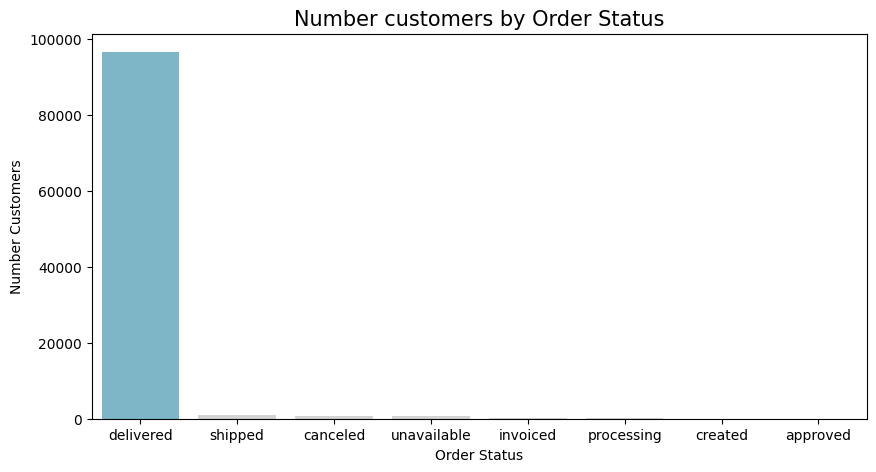

In [254]:
colors = ["#72BCD4" if orderstatus == customer_byorderstatus['order_status'][0] else "#D3D3D3" for orderstatus in customer_byorderstatus['order_status']]
plt.figure(figsize=(10, 5))

sns.barplot(
    data=customer_byorderstatus,
    x='order_status',
    y='customer_count',
    palette=colors
)
plt.title("Number customers by Order Status", fontsize=15)
plt.xlabel("Order Status")
plt.ylabel("Number Customers")
plt.xticks(fontsize=10)

plt.show()

diatas menunjukkan bahwa customer terbanyak berasal dari status order `delivered`

### Pertanyaan 4: `Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?`

In [255]:
spend_money = all_data.groupby(by='customer_id').price.sum().sort_values(ascending=False).reset_index()
spend_money.head()

,customer_id,price
0,1617b1357756262bfa56ab541c47bc16,13440.00
1,9af2372a1e49340278e7c1ef8d749f34,11383.95
2,de832e8dbb1f588a47013e53feaa67cc,10856.10
3,63b964e79dee32a3587651701a2b8dbf,9888.00
4,6f241d5bbb142b6f764387c8c270645a,9520.14


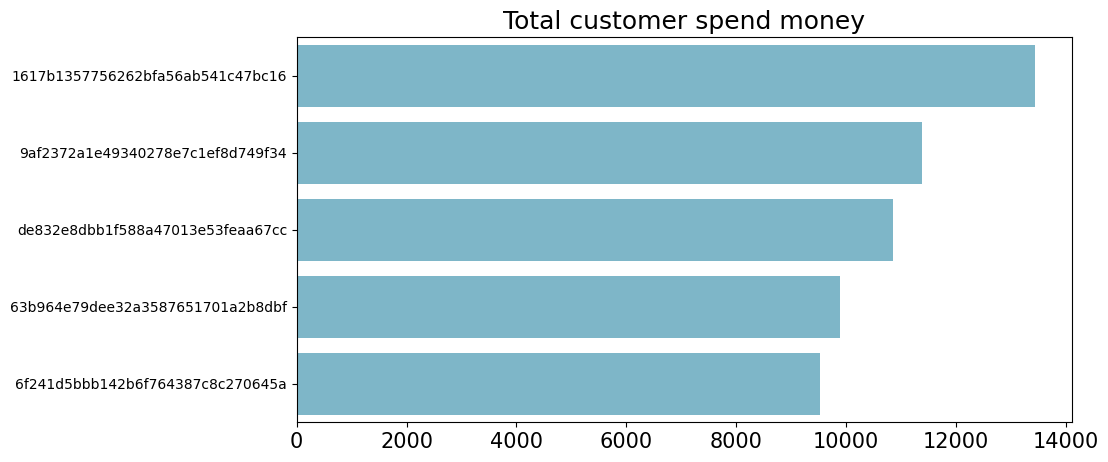

In [256]:
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.figure(figsize=(10, 5))

sns.barplot(
    data = spend_money.head(5),
    x='price',
    y='customer_id',
    palette=colors
)

plt.ylabel(None)
plt.xlabel(None)
plt.title("Total customer spend money", loc="center", fontsize=18)
plt.tick_params(axis='x', labelsize=15)

plt.show()

bisa kita lihat diatas total terbanayak customer menghabiskan total  `$13440`

### Pertanyaan 5: `Bagaimana tingkat kepuasan pelanggan terhadap layanan kami?`

In [257]:
review_scores = all_data.groupby(by='review_score').customer_id.nunique().sort_values(ascending=False).reset_index()

review_scores.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

review_scores.head()

,review_score,customer_count
0,5.0,57076
1,4.0,19098
2,1.0,11392
3,3.0,8160
4,2.0,3148


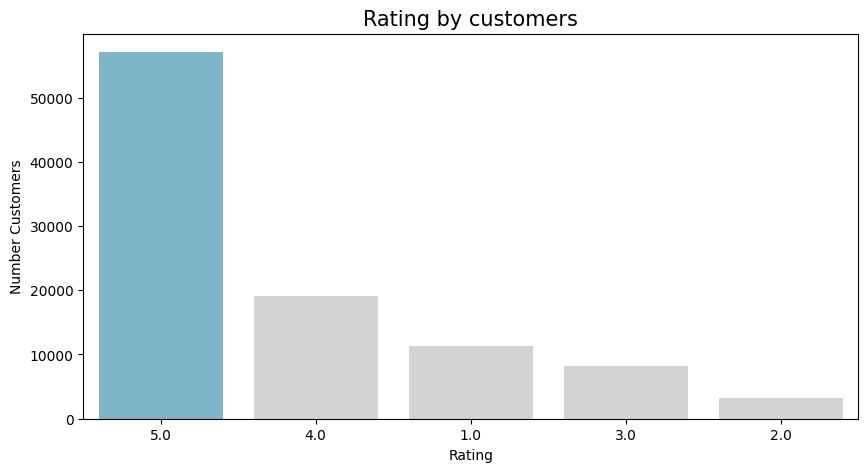

In [258]:
colors = ["#72BCD4" if revscore == review_scores['review_score'][0] else "#D3D3D3" for revscore in review_scores['review_score']]
plt.figure(figsize=(10, 5))

sns.barplot(
    data=review_scores,
    x='review_score',
    y='customer_count',
    order=review_scores.review_score,
    palette=colors
)
plt.title("Rating by customers", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Number Customers")
plt.xticks(fontsize=10)

plt.show()

bisa kita lihat diatas tingkat kepuasan customer terhadap layanan adalah dominan `bintang 5` dengan jumlah customer `57076`

### Pertanyaan 6: `Bagaimana letak geografis pelanggan terbanyak?`

In [259]:
customer_map = pd.merge(
    left=customers_df,
    right=geolocations_df,
    how='inner',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
)

customer_map.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409,-20.515413,-47.398194,franca,SP


In [260]:
!pip install geobr descartes

In [261]:
from geobr import read_state
import geopandas as gpd

In [262]:
geoloction_state = geolocations_df.groupby(by=['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='total')
geoloction_state = geoloction_state.drop_duplicates(subset='geolocation_zip_code_prefix')
geoloction_state = geoloction_state.drop('total', axis=1)
geoloction_state.head()

,geolocation_zip_code_prefix,geolocation_state
0,1001,SP
1,1002,SP
2,1003,SP
3,1004,SP
4,1005,SP


In [263]:
geo_zip_state_city = geolocations_df.groupby(by=['geolocation_zip_code_prefix','geolocation_state', 'geolocation_city'])[['geolocation_lat', 'geolocation_lng']].median().reset_index()
geo_zip_state_city = geo_zip_state_city.drop_duplicates(subset='geolocation_zip_code_prefix')

customer_geolocation_df = pd.merge(
    left=customers_df,
    right=geo_zip_state_city,
    how='inner',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
)

customer_geolocation_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_state,geolocation_city,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409,SP,franca,-20.502307,-47.39674
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,Active,14409,SP,franca,-20.502307,-47.39674
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,Active,14409,SP,franca,-20.502307,-47.39674
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,Active,14409,SP,franca,-20.502307,-47.39674
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,Active,14409,SP,franca,-20.502307,-47.39674


In [264]:
customer_geolocation_df.to_csv('customer_geo.csv', index=False)

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


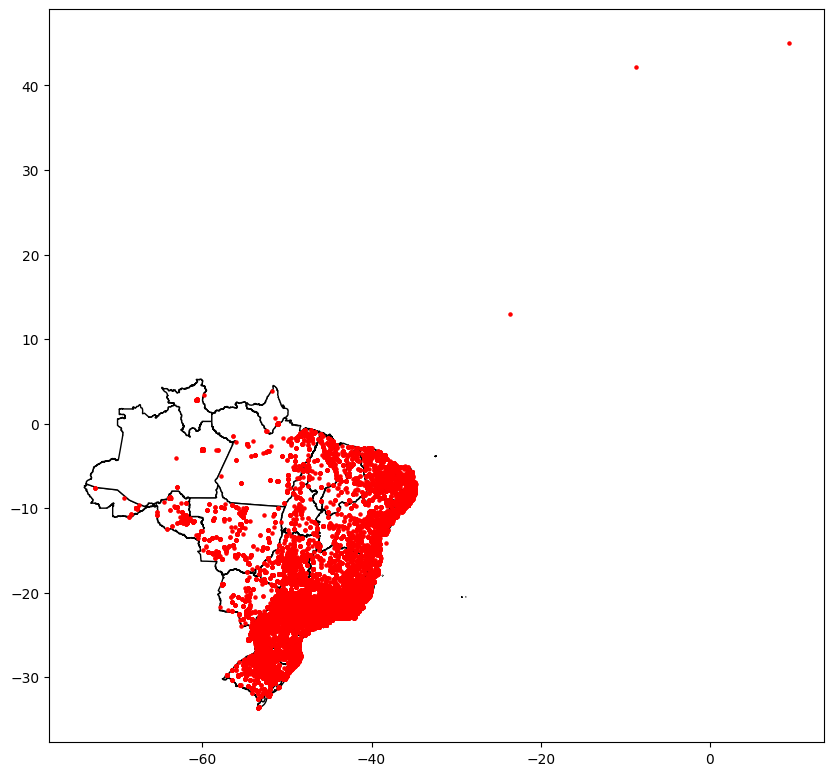

In [265]:
fig, ax = plt.subplots(figsize=(10, 10))

mun = read_state(year=2020)
mun.plot(ax=ax, color='white', edgecolor='black')

gdf = gpd.GeoDataFrame(
    customer_geolocation_df,
    geometry=gpd.points_from_xy(customer_geolocation_df['geolocation_lng'], customer_geolocation_df['geolocation_lat'])
    )
gdf.plot(ax=ax, color='red', marker='o', markersize=5)

plt.show()

karena dataset merupakan data dari e-commerce `brazil` maka kita akan memakai peta brazil lokasi untuk melihat sebaran pelanggan kita

## Conclusion

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
> Berdasarkan visualisasi di atas, kita dapat melihat bahwa `jumlah order` & `revenue terbanyak` terjadi pada bulan `Januari`, `Maret` dan `Mei`. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan `Februari`, `Juni` dan `September`.

- Produk apa yang paling banyak dan paling sedikit terjual?
> Berdasarkan visualisasi diatas menunjukkan bahwa category product dengan penjualan terbanyak adalah `bed bath table`, sebaliknya penjualan sedikit adalah `security and service`

- Bagaimana demografi pelanggan yang kita miliki?
> Berdasarkan visualisasi diatas menunjukkan bahwa  customer terbanyak berasal dari state `SP`, city `sao paulo`, dan status order `delivered`

- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
> Berdasarkan visualisasi diatas menunjukkan bahwa total terbanyak customer menghabiskan total  `$13440`

- Bagaimana tingkat kepuasan pelanggan terhadap layanan kami?
> Berdasarkan visualisasi diatas menunjukkan bahwa tingkat kepuasan customer terhadap layanan adalah dominan `bintang 5` dengan jumlah customer `57076`


- Bagaimana letak geografis pelanggan terbanyak?
> Berdasarkan visualisasi diatas karena dataset merupakan data dari e-commerce `brazil` maka kita akan memakai peta brazil, untuk melihat sebaran pelanggan kita